# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.

# Project

*DISCLAIMER*: In order to view plotly graphs and interactive map, it is highly recommended to open via Colab button or the link in README!

## **Plan on Covid-19 based on the analysis below:**

<div><img width="625px" height="auto" src="https://www.cleanlink.com/resources/editorial/2020/stop-covid-19-25423.jpg" /></div>

### **Spread**
    * Contact with another sick patient
    * Contact with others mostly range from [0:200]
    * Capital region, city - Gyeongsan-si
    * Overseas inflown cases

### **Mass gatherings**
    * Outbreak in Shinceonji Church

### **Most vulnerable**
    * Positive correlation between age and death count
    * Dead after 6 days - median
    * Pneumonia search trend

### **Age**
    * Mostly sick are youngs (20s)

### **Policies**
    * Immigration 
    * Education

### **Duration of sick**
    * Median 23 days

### **Influencers**
    * Sex - females get sick more often
    * Wind
    * Average tempareture

## Preliminary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats
import math
import folium
from folium import plugins
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.manifold import TSNE
import data_describe as dd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import warnings

warnings.filterwarnings(action='ignore')
sns.set(rc={'figure.figsize':(15, 10)})

In [2]:
case = pd.read_csv("data\Case.csv", na_values='-')
patient = pd.read_csv("data\PatientInfo.csv", na_values='-')
time = pd.read_csv("data\Time.csv", na_values='-')
time_age = pd.read_csv("data\TimeAge.csv", na_values='-')
time_gender = pd.read_csv("data\TimeGender.csv", na_values='-')
time_province = pd.read_csv("data\TimeProvince.csv", na_values='-')
policy = pd.read_csv("data\Policy.csv", na_values='-')
region = pd.read_csv("data\Region.csv", na_values='-')
search_trend = pd.read_csv("data\SearchTrend.csv", na_values='-')
seoul_floating = pd.read_csv("data\SeoulFloating.csv", na_values='-')
weather = pd.read_csv("data\Weather.csv", na_values='-')

## Case


    Data of COVID-19 infection cases in South Korea



**case_id**: the ID of the infection case

*   case_id(7) = region_code(5) + case_number(2)

**province**: Special City / Metropolitan City / Province(-do)

**city**: City(-si) / Country (-gun) / District (-gu)
*   The value 'from other city' means that where the group infection started is other city.

**group**: TRUE: group infection / FALSE: not group
*    If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.
*   The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection.

**infection_case**: the infection case (the name of group or other cases)
*   The value 'overseas inflow' means that the infection is from other country.
*   The value 'etc' includes individual cases, cases where relevance classification is ongoing after investigation, and cases under investigation.

**confirmed**: the accumulated number of the confirmed

**latitude**: the latitude of the group (WGS84)

**longitude**: the longitude of the group (WGS84)

In [3]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    case_id        174 non-null    int64  
 1   province        174 non-null    object 
 2   city            121 non-null    object 
 3   group           174 non-null    bool   
 4   infection_case  174 non-null    object 
 5   confirmed       174 non-null    int64  
 6   latitude        65 non-null     float64
 7   longitude       65 non-null     float64
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 9.8+ KB


In [4]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.482080,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [5]:
pd.DataFrame(round(case["confirmed"].describe()))

,confirmed
count,174.0
mean,65.0
std,355.0
min,0.0
25%,4.0
50%,10.0
75%,32.0
max,4511.0


According to the statistical description table, there are extreme outliers (max v 75%).

To see the extremes better, I plot confirmed cases by province.

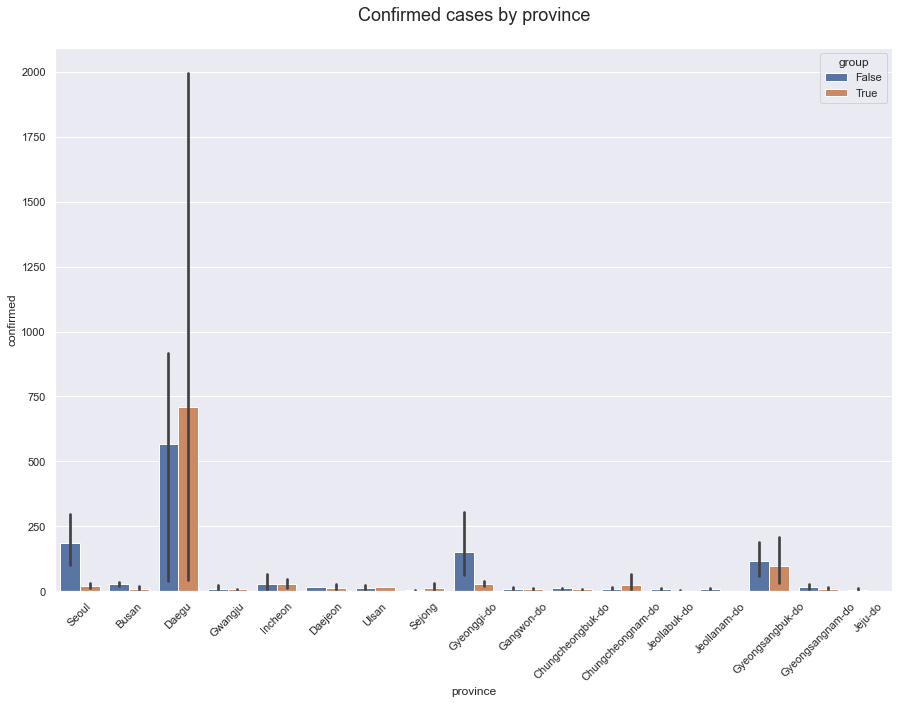

In [6]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.barplot(x="province", y="confirmed", hue="group", data=case)
plt.xticks(rotation=45)
plt.title("Confirmed cases by province\n", fontsize=18)
plt.show()

Clear outlier in Daegu group case. Shall investigate further.

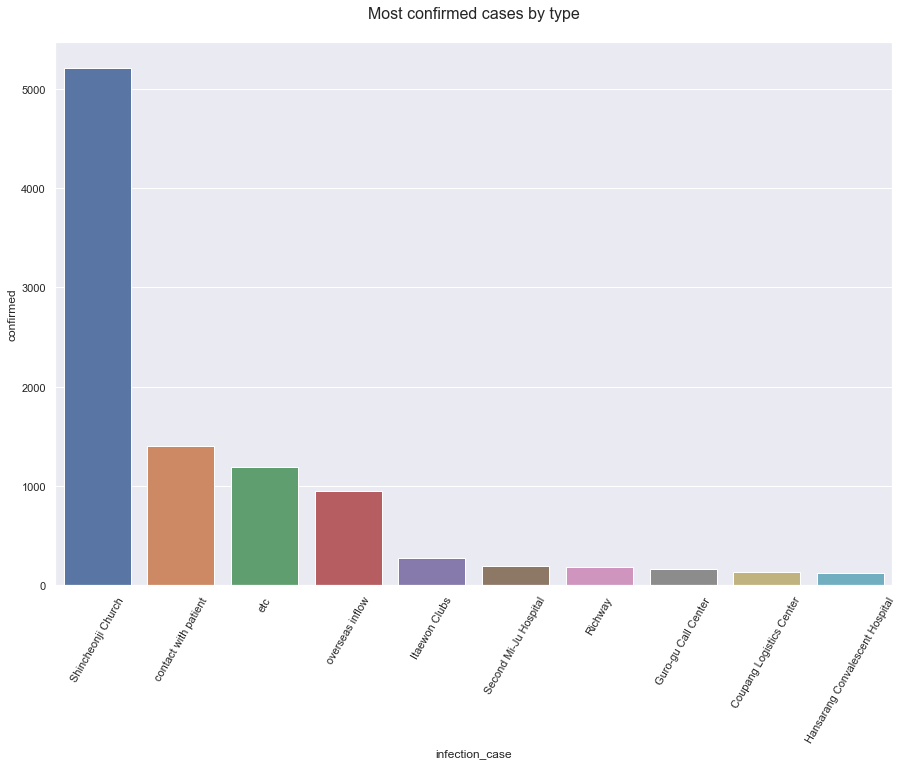

In [7]:
hotspot_cases = pd.DataFrame(
    case.groupby(["infection_case"])["confirmed"].sum().nlargest(n=10)
)

sns.set(rc={"figure.figsize": (15, 10)})
sns.barplot(x=hotspot_cases.index, y="confirmed", data=hotspot_cases)

plt.xticks(rotation=60)
plt.title("Most confirmed cases by type\n", fontsize=16)
plt.show()

The mentioned outlier is in Shincheonji Church.

Shincheonji Church in reality:

<div><img width="400px" height="auto" src="https://freedomofconscience.eu/wp-content/uploads/2020/02/shincheonji.jpg" /></div>

Second most - contact with patient

This supports the idea that covid outbreak happened in Shincheonji Church through contact (small space - large amount of people)

In [8]:
seoul_daegu = case.loc[((case["province"] == "Seoul") | (case["province"] == "Daegu"))]

In [9]:
seoul_daegu.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.482080,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [10]:
pd.DataFrame(round(seoul_daegu["confirmed"].describe()))

,confirmed
count,48.0
mean,166.0
std,663.0
min,0.0
25%,4.0
50%,12.0
75%,56.0
max,4511.0


In [11]:
quartile_4 = seoul_daegu.loc[seoul_daegu['confirmed'] > 57]

In [12]:
quartile_4.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.482080,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
35,1000036,Seoul,NaN,False,overseas inflow,298,NaN,NaN
36,1000037,Seoul,NaN,False,contact with patient,162,NaN,NaN


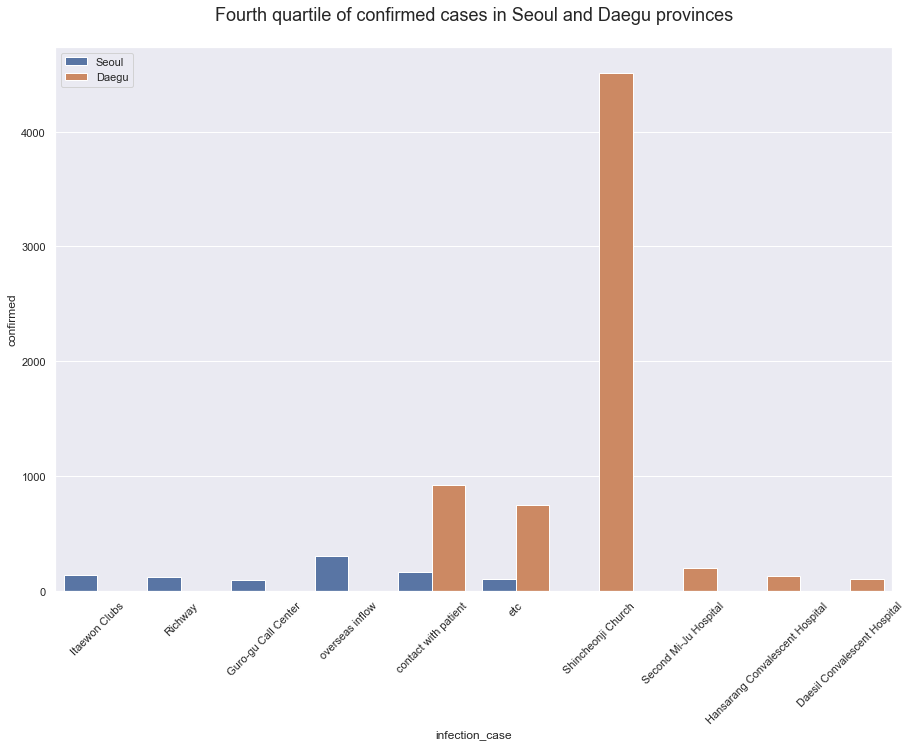

In [13]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.barplot(
    x="infection_case",
    y="confirmed",
    data=quartile_4,
    hue="province",
)

plt.xticks(rotation=45)
plt.title(
    "Fourth quartile of confirmed cases in Seoul and Daegu provinces\n", fontsize=18
)
plt.legend(loc="upper left")
plt.show()

This chart shows forth quartile and points out again an outlier in Daegu church.

Seoul province does not show anything significant, besides Guro-gu Call Center.

## Patient

### Missing values

**patient_id:** the ID of the patient

**patient_id(10)** = region_code(5) + patient_number(5)

There are two types of the patient_number
1) local_num: The number given by the local government.
2) global_num: The number given by the KCDC

**Other columns - self explanatory**

In [14]:
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [15]:
patient.iloc[:, 9:13] = patient.iloc[:, 9:13].apply(pd.to_datetime, errors="coerce")

In [16]:
pd.DataFrame(patient.isna().sum())

,0
patient_id,0
sex,1122
age,1380
country,0
province,0
city,94
infection_case,919
infected_by,3819
contact_number,4378
symptom_onset_date,4476


Visualize missing values for patient data as a bar plot

<AxesSubplot:>

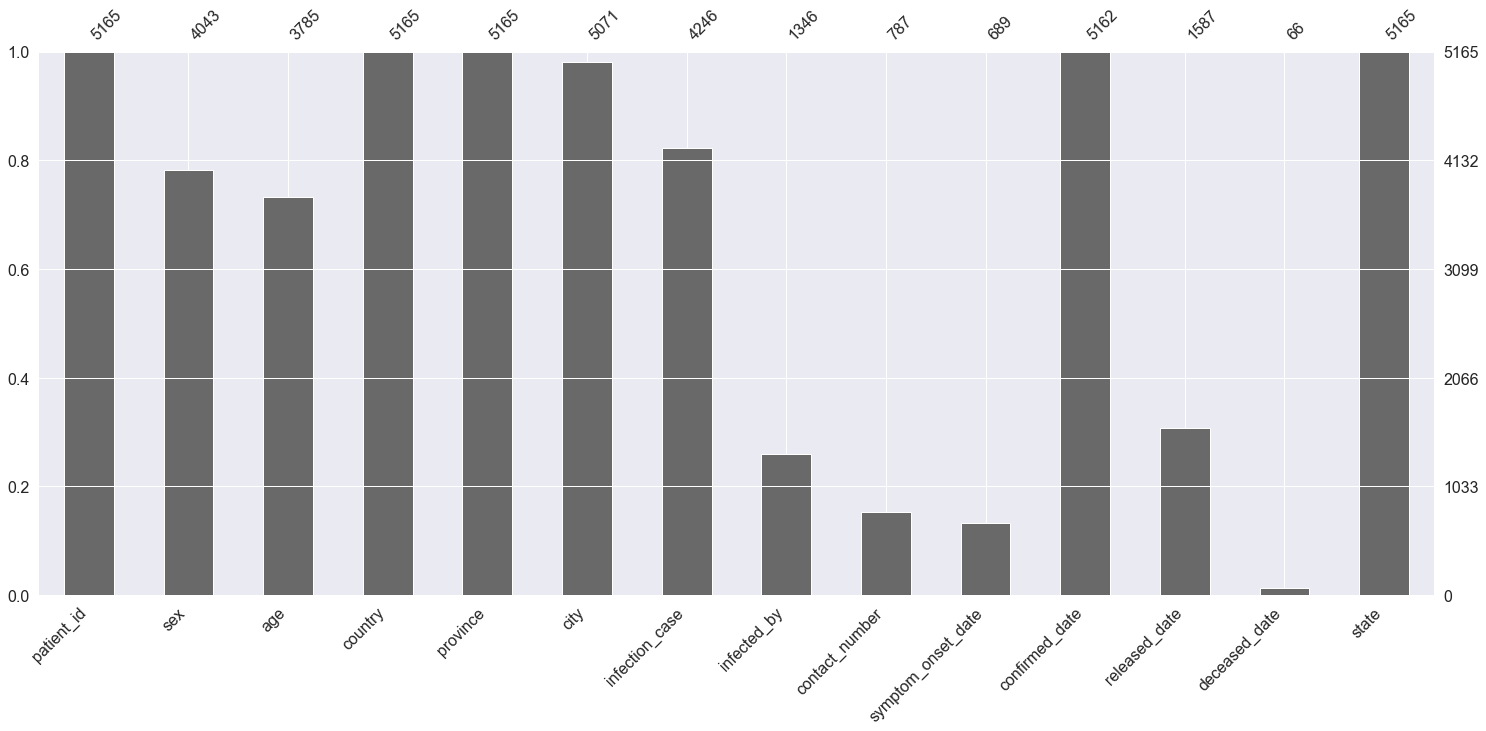

In [17]:
msno.bar(patient)

### EDA

#### All patients

In [18]:
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17.0,NaT,2020-01-30,2020-02-19,NaT,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2.0,NaT,2020-01-31,2020-02-24,NaT,released


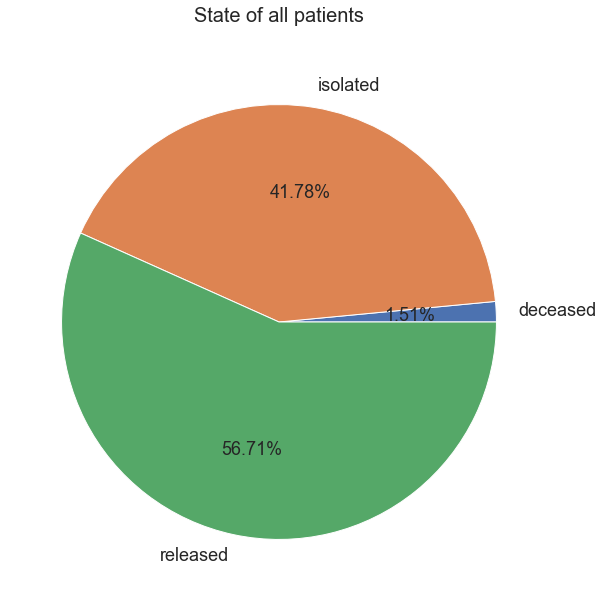

In [19]:
patient.groupby(["state"]).size().plot(
    kind="pie", autopct="%.2f%%", textprops={"fontsize": 18}
)
plt.ylabel("")
plt.title("State of all patients\n", fontsize=20)
plt.show()

There is merely 1.51% of patient who have been deceased. How significant are the results of EDA on deceased patients?




Naturally these question rose:
* How long from confirmed to released?
* How long for isolation?

They will be tackled in the further analysis

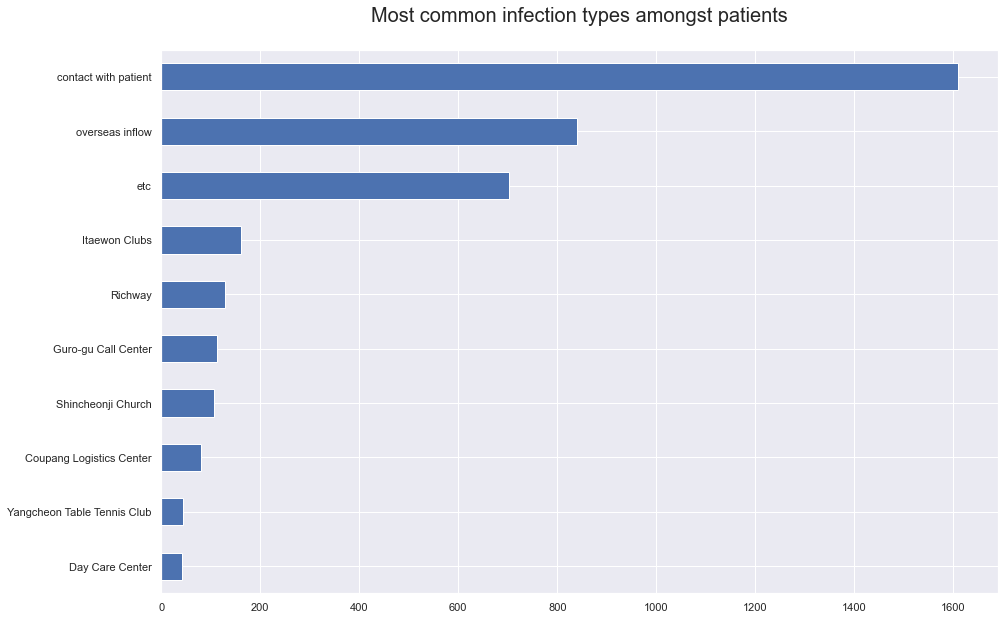

In [20]:
patient["infection_case"].value_counts().nlargest(n=10).sort_values(
    ascending=True
).plot(kind="barh")
plt.title("Most common infection types amongst patients\n", fontsize=20)
plt.show()

This horizontal bar chart explains spread of Covid-19. It is mostly transmitted through contact with another patient. Since it did not originate in South Korea, overseas travelling brought it to the country. Lastly, infection bubbles might exist but there are high number of individual cases (etc) - could this be a trend or missing data problem?

In [21]:
patient_contact = patient[ ~patient.contact_number.isna()]

In [22]:
patient_contact["contact_number"] = list(map(int, patient_contact["contact_number"]))

In [23]:
patient_contact = patient_contact[patient_contact['contact_number'] < 10000]

In [24]:
pd.DataFrame(round(patient_contact["contact_number"].describe(), 1))

,contact_number
count,784.0
mean,17.3
std,67.5
min,0.0
25%,2.0
50%,4.0
75%,14.0
max,1160.0


It is clear that there quite few outliers, while median is merely 4 people. However, there are only 787 entries from 5165 patients - 15%. Conclusions out of the following chart should be taken with a grain of salt.

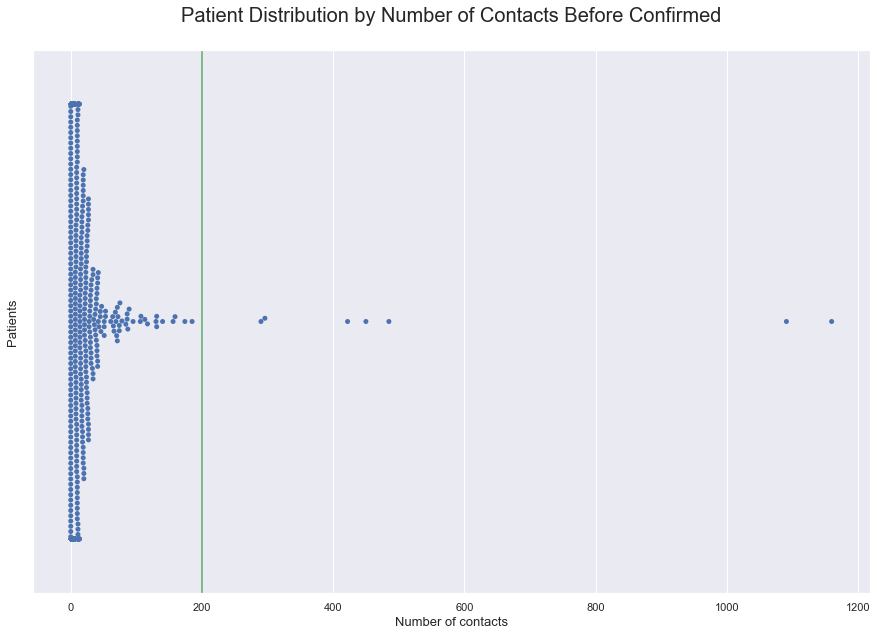

In [25]:
sns.swarmplot(x="contact_number", data=patient_contact)
plt.xlabel("Number of contacts", size=13)
plt.ylabel("Patients", size=13)
plt.title("Patient Distribution by Number of Contacts Before Confirmed\n", fontsize=20)
plt.axvline(x=200, color="g")
plt.show()

Swarmplot shows majority of contacts are within the interval [0:200] with most below 100. There are 7 outliers

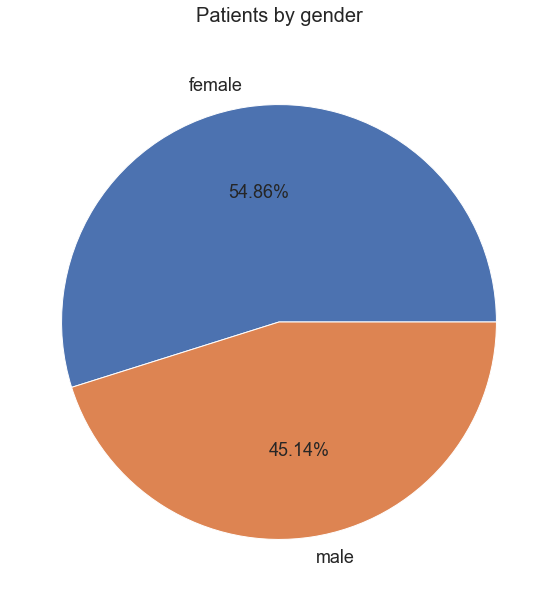

In [26]:
patient.groupby(["sex"]).size().plot(
    kind="pie", autopct="%.2f%%", textprops={"fontsize": 18}
)
plt.ylabel("")
plt.title("Patients by gender\n", fontsize=20)
plt.show()

Is there a statistically significant difference?

**Null Hypothesis:**

Females = 0.5 (50%)

**Alternative:**

Females != 0.5



In [27]:
# Low alpha selected to have higher confidence in the results
significance = 0.01

In [28]:
z_critical = stats.norm.ppf(q=0.995)
sample_size = patient["sex"].value_counts().sum()
expected_proportion = 0.5
observed_proportion = 0.5468

In [29]:
z_score = (observed_proportion - expected_proportion) / math.sqrt(
    expected_proportion * (1 - expected_proportion) / sample_size
)

p_value = stats.norm.sf(abs(z_score)) * 2

In [30]:
print('z_score: %0.3f, p_value: %0.10f\n' % (z_score, p_value))

z_score: 5.952, p_value: 0.0000000027



In [31]:
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

Reject the null hypothesis - suggest the alternative hypothesis is true


Statistical one proportion z-test suggest that in South Korea females get covid more often than males.

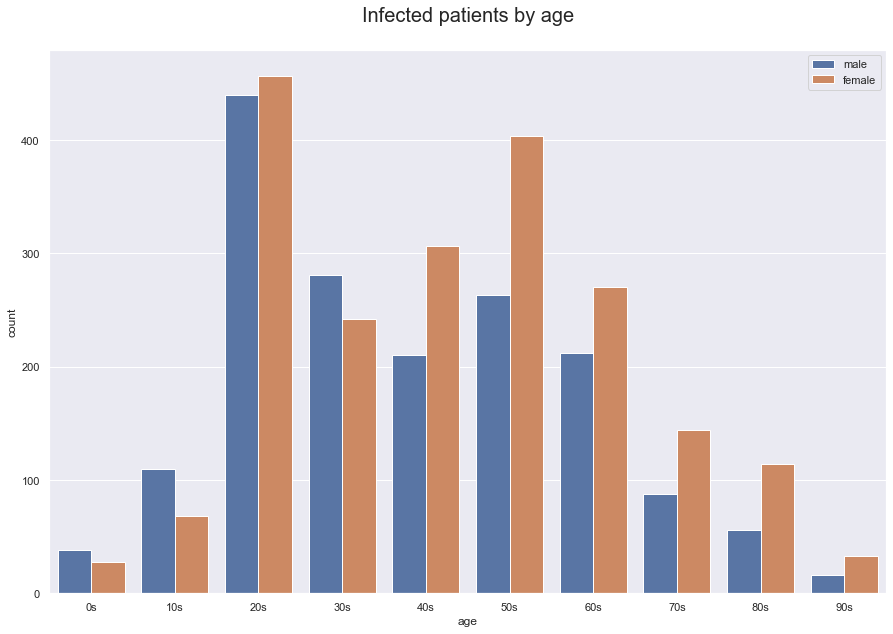

In [32]:
age_order = ["0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"]

sns.countplot(x="age", data=patient, hue="sex", order=age_order)
plt.legend(loc="upper right")
plt.title("Infected patients by age\n", fontsize=20)
plt.show()

This bar chart supports statistical claim that females get covid more often that male. Mostly it is seen among 40s-90s age groups.

Worth to notice, even though 20s group is responsible for most covid cases, there are no deceased patients in this age group (reference to deceased part of EDA)

In [33]:
duration_released = patient.loc[patient['state'] == 'released']

In [34]:
duration_released["Duration_days"] = (
    patient["released_date"] - patient["confirmed_date"]
).dt.days

In [35]:
pd.DataFrame(round(duration_released["Duration_days"].describe(), 1))

,Duration_days
count,1579.0
mean,24.7
std,13.0
min,0.0
25%,16.0
50%,23.0
75%,31.0
max,114.0


This suggests that on average people are sick for around 25 days.

The median is 23 days which is quite close to the mean - not skewed.

Interquantile range is 18 days. This describes how spread out the 50% is.


In [36]:
duration_released = duration_released.loc[
    duration_released["released_date"].isna() == False
]

In [37]:
duration_released = duration_released.reset_index(drop=True)

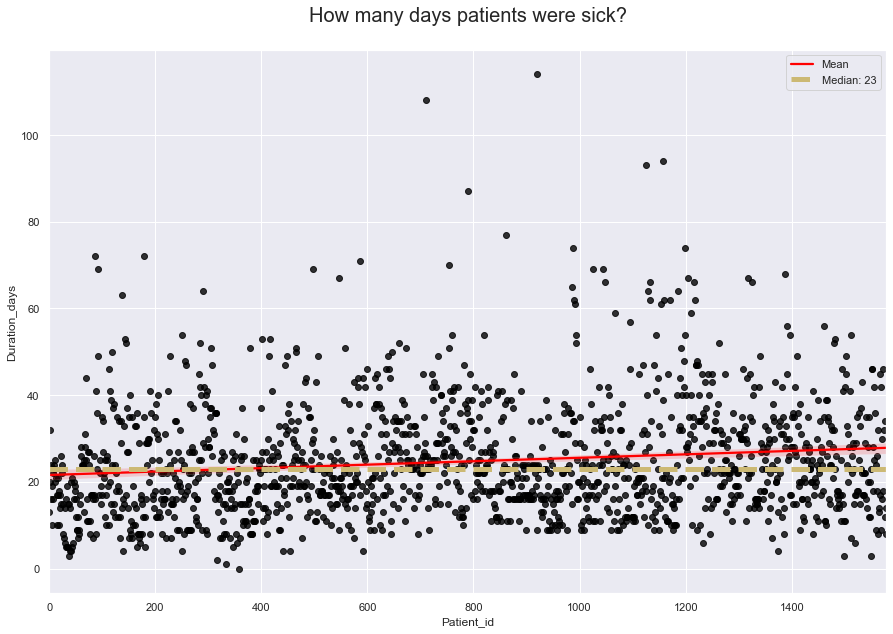

In [38]:
sns.regplot(
    x=duration_released.index,
    y="Duration_days",
    data=duration_released,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)

median_duration = np.median(duration_released["Duration_days"])

plt.xlabel("Patient_id")
plt.title("How many days patients were sick?\n", fontsize=20)
plt.axhline(median_duration, color="y", linestyle="--", linewidth=5)
plt.legend(
    {
        f"Mean": np.mean(duration_released["Duration_days"]),
        f"Median: {int(median_duration)}": median_duration,
    }
)
plt.show()

#### Deceased patients

<AxesSubplot:>

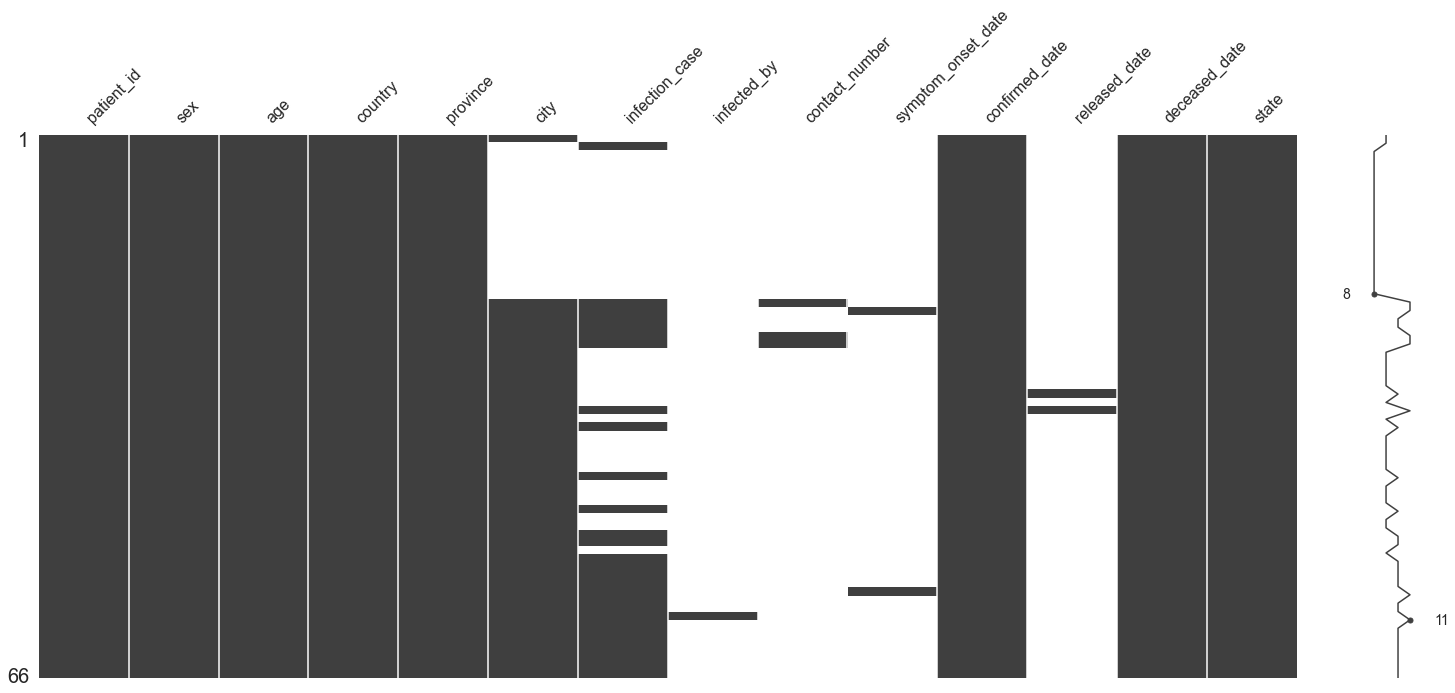

In [39]:
deceased_patients = patient.loc[patient['deceased_date'].isna() == False]
msno.matrix(deceased_patients)

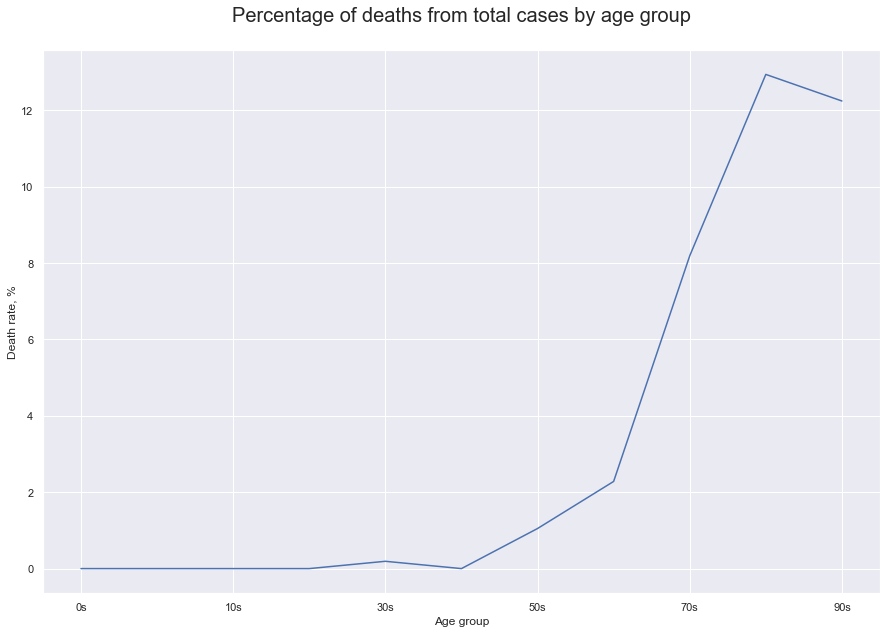

In [40]:
percentage_dead = (deceased_patients['age'].value_counts() / patient.age.value_counts() * 100)
percentage_dead = percentage_dead.replace(np.nan, 0)

percentage_dead.plot()
plt.ylabel("Death rate, %")
plt.xlabel("Age group")
plt.title("Percentage of deaths from total cases by age group\n", fontsize=20)
plt.show()

It is clear trend that up to 40s people almost do not die from covid, however, we see a huge spike in death rates for older age groups.

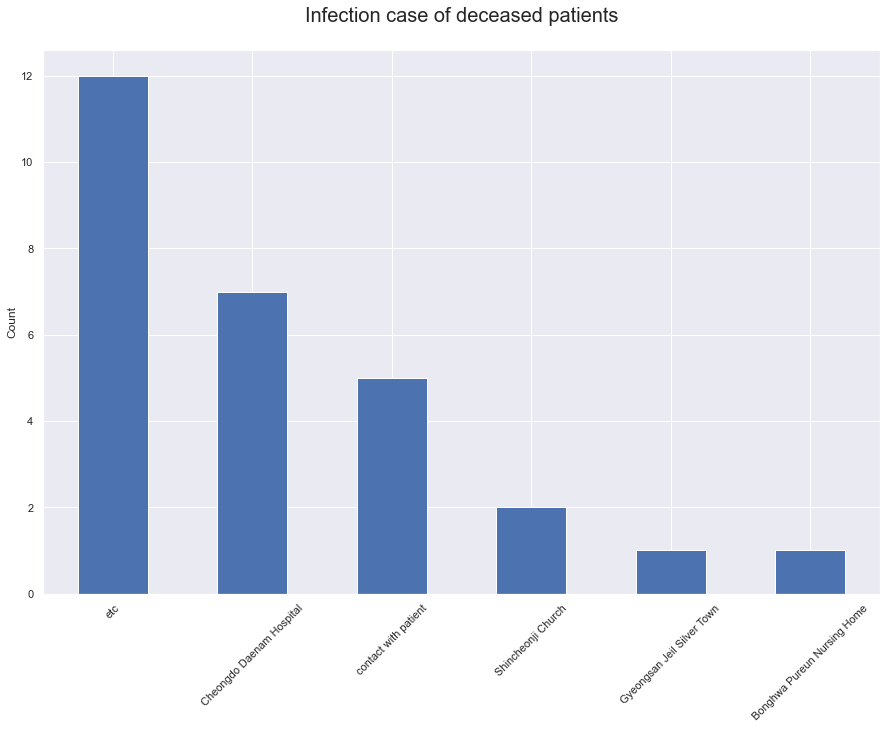

In [41]:
deceased_patients["infection_case"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Infection case of deceased patients\n", fontsize=20)
plt.show()

In [42]:
deceased_duration = pd.DataFrame(
    (deceased_patients["deceased_date"] - deceased_patients["confirmed_date"]).dt.days,
    columns=["Duration_days"],
)

In [43]:
deceased_duration.reset_index(drop=True, inplace=True)

In [44]:
round(deceased_duration.describe(), 1)

,Duration_days
count,66.0
mean,10.9
std,14.4
min,-1.0
25%,2.0
50%,6.0
75%,11.8
max,67.0


-1 means that patient was deceased before confirmation of covid infection.

In [45]:
deceased_duration = deceased_duration[deceased_duration != -1].dropna()

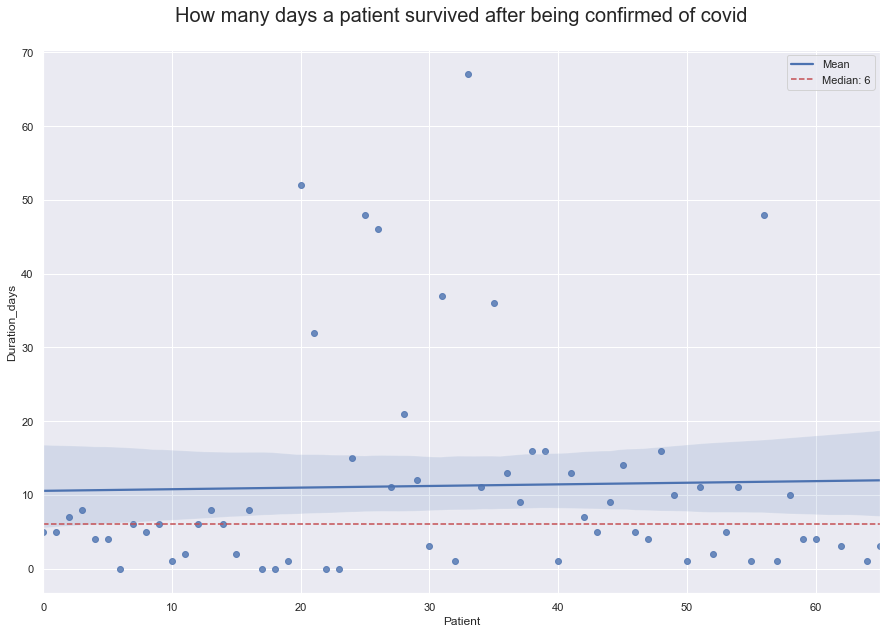

In [46]:
median_duration = np.median(deceased_duration)

sns.regplot(x=deceased_duration.index, y="Duration_days", data=deceased_duration)
plt.xlabel("Patient")
plt.title(
    "How many days a patient survived after being confirmed of covid\n", fontsize=20
)
plt.axhline(median_duration, color="r", linestyle="--")
plt.legend(
    {
        "Mean": np.mean(deceased_duration),
        f"Median: {int(median_duration)}": median_duration,
    }
)
plt.show()

It is clear that there are few outliers which had covid for 30-70 days. However, tendency is that patients mostly survive only 6 days after confirmation of covid. Interquantile range: 10 days.

### Provinces + map visual

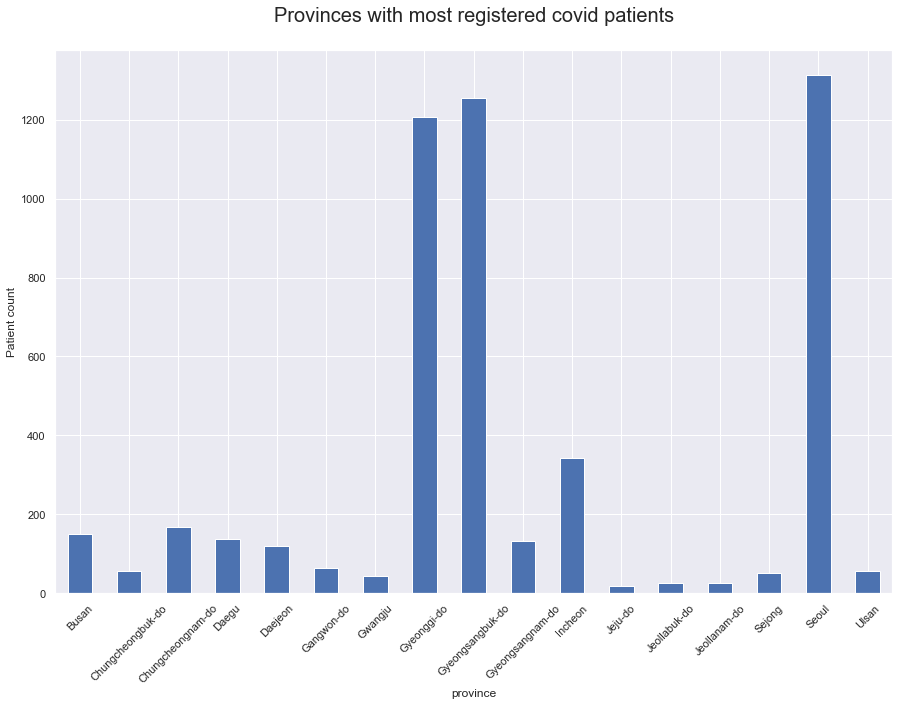

In [47]:
patient.groupby(["province"]).size().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Patient count")
plt.title("Provinces with most registered covid patients\n", fontsize=20)
plt.show()

It is clearly dominated by 3 provinces, it could be useful to see the spread on the map.

In [48]:
regional_patient = pd.merge(
    patient[["patient_id", "confirmed_date", "sex", "age", "province", "city"]],
    region[["province", "city", "latitude", "longitude"]],
    how="left",
    on=["province", "city"],
)

You may explore interactive map of covid-19 in South Korea. It shows clusters and spread of covid in various cities.

In [49]:
heat_data = (
    regional_patient.groupby(["latitude", "longitude"])["patient_id"]
    .count()
    .reset_index()
    .values.tolist()
)

m = folium.Map([36, 128], zoom_start=7)

folium.plugins.HeatMap(heat_data).add_to(m)

m

### Clustering

To do spatial clustering I will use scikit-learn's DBSCAN with the haversine metric and ball-tree algorithm.

In [50]:
to_cluster_df = regional_patient.copy()

In [51]:
to_cluster_df.dropna(inplace=True)

In [52]:
to_cluster_df.head()

,patient_id,confirmed_date,sex,age,province,city,latitude,longitude
0,1000000001,2020-01-23,male,50s,Seoul,Gangseo-gu,37.551166,126.849506
1,1000000002,2020-01-30,male,30s,Seoul,Jungnang-gu,37.606832,127.092656
2,1000000003,2020-01-30,male,50s,Seoul,Jongno-gu,37.572999,126.979189
3,1000000004,2020-01-30,male,20s,Seoul,Mapo-gu,37.566283,126.901644
4,1000000005,2020-01-31,female,20s,Seoul,Seongbuk-gu,37.589562,127.016700


In [53]:
to_cluster_df["latitude_longitude"] = to_cluster_df[["latitude", "longitude"]].apply(
    tuple, axis=1
)

In [54]:
coords = to_cluster_df[["latitude", "longitude"]].to_numpy()

In [55]:
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian

db = DBSCAN(eps=epsilon, min_samples=3, algorithm="ball_tree", metric="haversine").fit(
    np.radians(coords)
)

In [56]:
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print("Number of clusters: {}".format(num_clusters))
clusters_ = clusters.reset_index()
clusters_ = clusters_.rename(columns={0: "lat_long"})

Number of clusters: 138


In [57]:
cluster_data = pd.DataFrame()

for i in range(len(clusters_)):
    cl1 = pd.DataFrame(clusters_.lat_long.iloc[i])
    cl1 = cl1.rename(columns={0: "latitude", 1: "longitude"})
    cl1["cluster"] = i
    cl1["latitude_longitude"] = cl1[["latitude", "longitude"]].apply(tuple, axis=1)
    cluster_data = cluster_data.append(cl1)

cluster_data_ = cluster_data.drop_duplicates(subset="latitude_longitude")

In [58]:
cluster_data_.head()

,latitude,longitude,cluster,latitude_longitude
0,37.551166,126.849506,0,"(37.551166, 126.849506)"
0,37.606832,127.092656,1,"(37.606832, 127.092656)"
0,37.572999,126.979189,2,"(37.572999, 126.979189)"
0,37.566283,126.901644,3,"(37.566283, 126.901644)"
0,37.589562,127.016700,4,"(37.589562, 127.0167)"


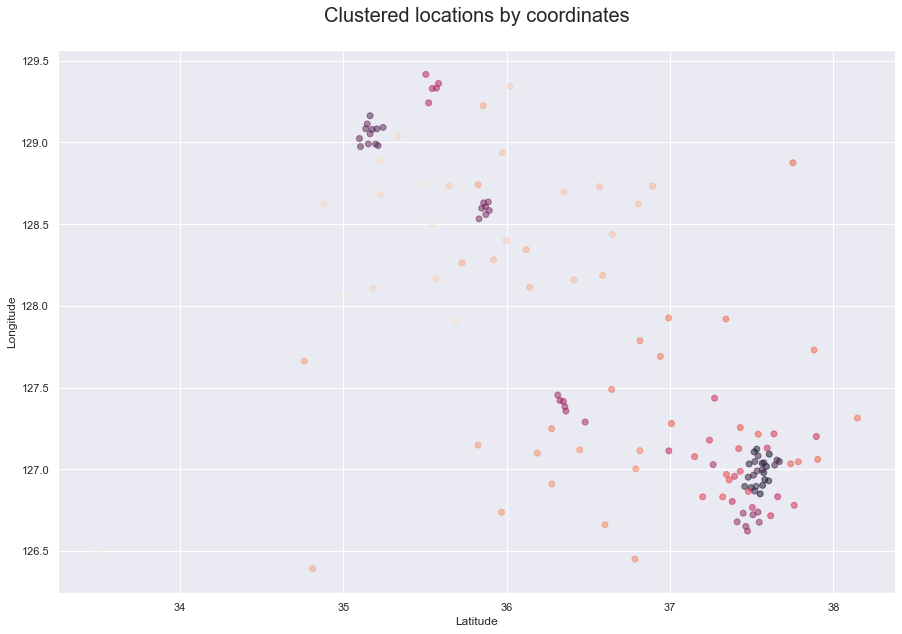

In [59]:
x = cluster_data_["latitude"].values
y = cluster_data_["longitude"].values
# c = db.labels_
sns.set(rc={"figure.figsize": (15, 10)})
plt.title("Clustered locations by coordinates\n", fontsize=20)
plt.scatter(x, y, alpha=0.5, c=np.array(cluster_data_.cluster))

plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.show()

In [60]:
clustered_data = pd.merge(cluster_data_, to_cluster_df, on="latitude_longitude")

In [61]:
clustered_data.head()

,latitude_x,longitude_x,cluster,latitude_longitude,patient_id,confirmed_date,sex,age,province,city,latitude_y,longitude_y
0,37.551166,126.849506,0,"(37.551166, 126.849506)",1000000001,2020-01-23,male,50s,Seoul,Gangseo-gu,37.551166,126.849506
1,37.551166,126.849506,0,"(37.551166, 126.849506)",1000000027,2020-02-23,male,50s,Seoul,Gangseo-gu,37.551166,126.849506
2,37.551166,126.849506,0,"(37.551166, 126.849506)",1000000106,2020-03-06,male,30s,Seoul,Gangseo-gu,37.551166,126.849506
3,37.551166,126.849506,0,"(37.551166, 126.849506)",1000000144,2020-03-09,female,40s,Seoul,Gangseo-gu,37.551166,126.849506
4,37.551166,126.849506,0,"(37.551166, 126.849506)",1000000150,2020-03-09,female,60s,Seoul,Gangseo-gu,37.551166,126.849506


Count within cluster

In [62]:
clustered_data.cluster.value_counts().nlargest(n=10)

109    638
75     130
65     114
98     110
72      78
112     78
115     71
56      60
125     53
110     52
Name: cluster, dtype: int64

Since 109th cluster is the largest, we dive deeper into understanding where.

In [63]:
max_cases_location = clustered_data.loc[clustered_data["cluster"] == 109]


In [64]:
max_cases_location['city'].value_counts()

Gyeongsan-si    638
Name: city, dtype: int64

In [65]:
max_cases_location.head()

,latitude_x,longitude_x,cluster,latitude_longitude,patient_id,confirmed_date,sex,age,province,city,latitude_y,longitude_y
2190,35.825056,128.741544,109,"(35.825056, 128.741544)",6001000001,2020-02-19,female,20s,Gyeongsangbuk-do,Gyeongsan-si,35.825056,128.741544
2191,35.825056,128.741544,109,"(35.825056, 128.741544)",6001000003,2020-02-20,female,40s,Gyeongsangbuk-do,Gyeongsan-si,35.825056,128.741544
2192,35.825056,128.741544,109,"(35.825056, 128.741544)",6001000004,2020-02-20,female,50s,Gyeongsangbuk-do,Gyeongsan-si,35.825056,128.741544
2193,35.825056,128.741544,109,"(35.825056, 128.741544)",6001000005,2020-02-20,female,20s,Gyeongsangbuk-do,Gyeongsan-si,35.825056,128.741544
2194,35.825056,128.741544,109,"(35.825056, 128.741544)",6001000006,2020-02-21,female,40s,Gyeongsangbuk-do,Gyeongsan-si,35.825056,128.741544


Gyeongsan-si is with the most entries of covid, above you can see the preview of this cluster. Further research could be done just by this region to understand why. However, it is out of the scope for this project.

### PCA Patient + weather

In [66]:
weather["date"] = pd.to_datetime(weather["date"])

In [67]:
patient_weather = pd.merge(
    patient[["province", "state", "sex", "age", "contact_number", "confirmed_date"]],
    weather,
    how="left",
    right_on=["province", "date"],
    left_on=["province", "confirmed_date"],
)

In [68]:
patient_weather.drop(
    columns=["province", "confirmed_date", "code", "date"], inplace=True
)

Assume nan = 0 with number of contacts

In [69]:
patient_weather["contact_number"] = patient_weather["contact_number"].replace(np.nan, 0)

Dropping nans since most of the are sex and age.

In [70]:
patient_weather.dropna(inplace=True)
patient_weather.reset_index(drop=True, inplace=True)

Transform male and females to binary representation.

In [71]:
patient_weather["sex"].replace(["female", "male"], [0.0, 1.0], inplace=True)

Transform age column to an integer datatype

In [72]:
patient_weather["age"] = patient_weather["age"].str.replace("s", "")
patient_weather["age"] = patient_weather["age"].astype(float)

In [73]:
patient_weather.head()

,state,sex,age,contact_number,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,released,1.0,50.0,75.0,4.6,0.0,9.9,0.0,4.7,290.0,49.3
1,released,1.0,30.0,31.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
2,released,1.0,50.0,17.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
3,released,1.0,20.0,9.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
4,released,0.0,20.0,2.0,3.9,1.4,8.9,0.0,4.4,270.0,59.6


MinMax Scaler: All the numeric values scaled between 0 and 1 with a MinMax Scaler

Xscaled= (X-Xmin)/(Xmax-Xmin)

In [74]:
scaler = MinMaxScaler()
X = patient_weather.iloc[:, 1:]
y = patient_weather["state"]
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [75]:
pca = PCA(n_components=3)
principal_Components = pca.fit_transform(scaled_X)

principal_df = pd.DataFrame(principal_Components, columns=["PC1", "PC2", "PC3"])

labeled_df = pd.concat([principal_df, y], axis=1)

In [76]:
print((pca.explained_variance_ratio_ * 100).sum())

78.7501147556484


In [77]:
fig = px.scatter_3d(
    labeled_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="state",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
)
fig.show()

In [78]:
n_pcs= pca.components_.shape[0]

In [79]:
initial_feature_names = [
    "sex",
    "age",
    "contact_number",
    "avg_temp",
    "min_temp",
    "max_temp",
    "precipitation",
    "max_wind_speed",
    "most_wind_direction",
    "avg_relative_humidity",
]

In [80]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [81]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [82]:
dic = {"PC{}".format(i + 1): most_important_names[i] for i in range(n_pcs)}

names = pd.DataFrame(sorted(dic.items()))

Most important feature in each principal component

In [83]:
names

,0,1
0,PC1,sex
1,PC2,most_wind_direction
2,PC3,avg_temp


## Time Series

### Total

In [84]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [85]:
time["date"] = pd.to_datetime(time["date"])

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=time["date"], y=time["test"], fill="tozeroy", name="total tests")
)
fig.add_trace(
    go.Scatter(x=time["date"], y=time["negative"], fill="tozeroy", name="negative test")
)
fig.add_trace(
    go.Scatter(
        x=time["date"], y=time["confirmed"], fill="tozeroy", name="positive test"
    )
)
fig.update_layout(
    title="Covid19 tests",
    yaxis_title="number of cases",
    font=dict(family="Arial, monospace", size=15, color="#7f7f7f"),
)
py.iplot(fig)

### By age

In [86]:
time_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


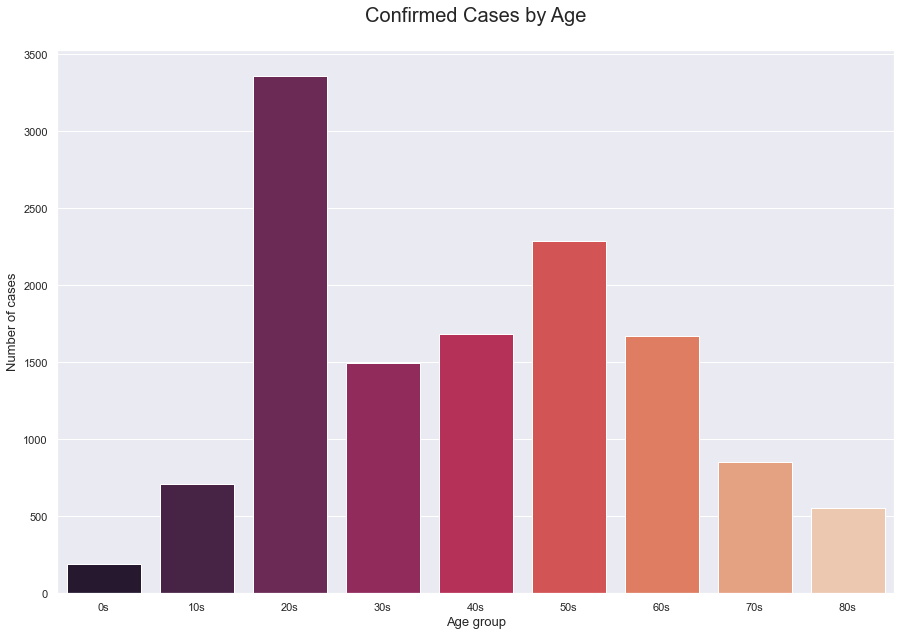

In [87]:
age_list = time_age["age"].unique()

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(age_list, time_age.confirmed[-9:], palette="rocket")
ax.set_xlabel("Age group", size=13)
ax.set_ylabel("Number of cases", size=13)
plt.title(f"Confirmed Cases by Age\n", fontsize=20)
plt.show()

### By gender

In [88]:
time_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


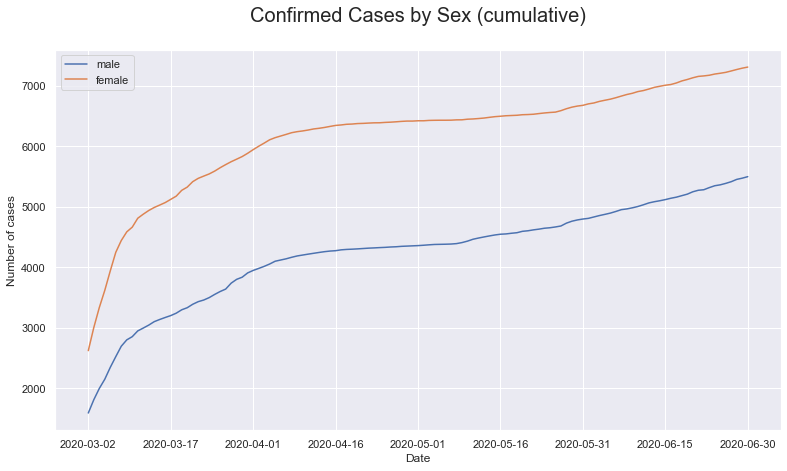

In [89]:
fig, ax = plt.subplots(figsize=(13, 7))

sex_confirmed = (
    time_gender[time_gender["sex"] == "male"].confirmed,
    time_gender[time_gender.sex == "female"].confirmed,
)

for sex_each, sex_label in zip(sex_confirmed, ["male", "female"]):
    plt.plot(time_gender.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[:: int(len(time_gender.date.unique()) / 8)])

plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.title("Confirmed Cases by Sex (cumulative)\n", fontsize=20)
ax.legend()
plt.show()

### By province

In [90]:
time_province.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


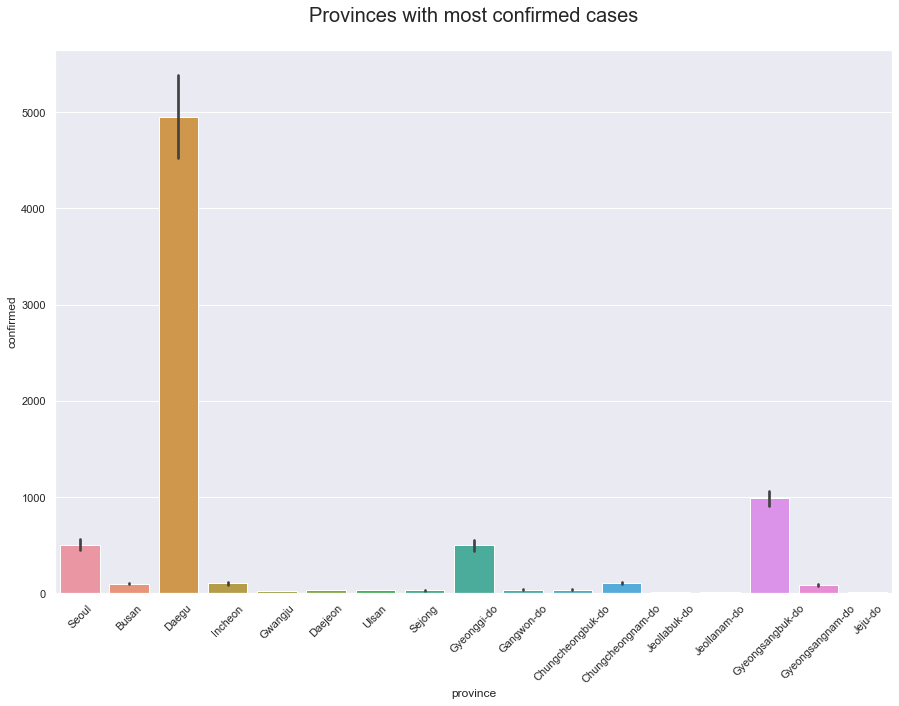

In [91]:
sns.barplot(x="province", y="confirmed", data=time_province)
plt.title("Provinces with most confirmed cases\n", fontsize=20)
plt.xticks(rotation=45)
plt.show()

## Additional data EDA

### Policy

In [92]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [93]:
print(f'Null check:\n{policy.isna().sum()}')

Null check:
policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      37
dtype: int64


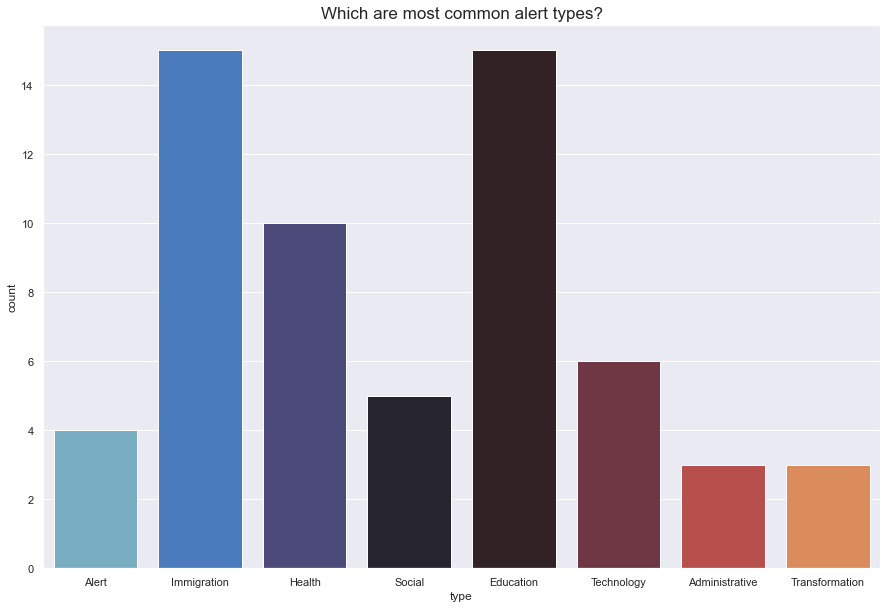

In [94]:
sns.countplot(x="type", data=policy, palette="icefire")
plt.title("Which are most common alert types?", fontsize=17)
plt.show()

### Region T-SNE visual

In [95]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [96]:
region_tsne = region.copy()

In [97]:
region_tsne.drop(columns=["code", "city", "latitude", "longitude"], inplace=True)

In [98]:
region_tsne.reset_index(drop=True, inplace=True)
region_tsne = region_tsne[region_tsne["province"] != "Korea"]

In [99]:
tsne = TSNE(
    n_components=2, perplexity=35.0, verbose=0.0, n_iter=5000, learning_rate=300.0
)
tsne_results = tsne.fit_transform(region_tsne.iloc[:, 1:])
tsne_df = pd.DataFrame(tsne_results, columns=["tsne0", "tsne1"])

In [100]:
region_tsne = pd.concat([region_tsne, tsne_df], axis=1)
region_tsne = region_tsne[region_tsne["province"] != "Korea"]

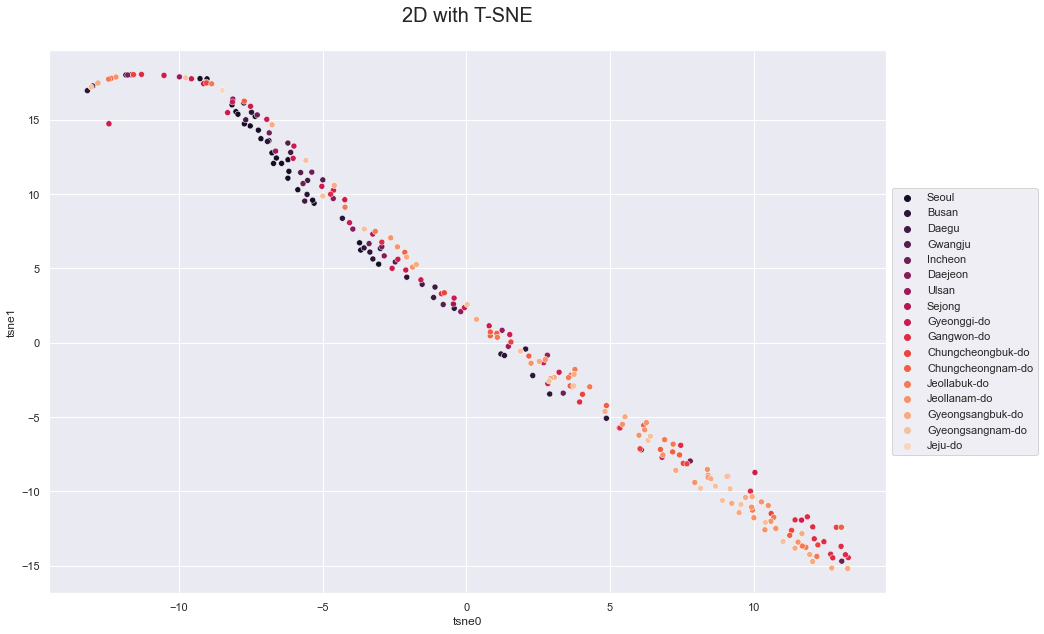

In [101]:
sns.scatterplot(
    data=region_tsne, x="tsne0", y="tsne1", hue="province", palette="rocket"
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("2D with T-SNE\n", fontsize=20)
plt.show()

## Modeling

### Data used

Time and search_trend datasets will be used to create linear model and infer conclusions about deceased patients.

In [102]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [103]:
search_trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [104]:
search_trend["date"] = pd.to_datetime(search_trend["date"])

In [105]:
modeling_df = pd.merge(
    time[["date", "test", "negative", "confirmed", "released", "deceased"]],
    search_trend,
    how="left",
    on="date",
)

In [106]:
modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         163 non-null    datetime64[ns]
 1   test         163 non-null    int64         
 2   negative     163 non-null    int64         
 3   confirmed    163 non-null    int64         
 4   released     163 non-null    int64         
 5   deceased     163 non-null    int64         
 6   cold         162 non-null    float64       
 7   flu          162 non-null    float64       
 8   pneumonia    162 non-null    float64       
 9   coronavirus  162 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 14.0 KB


In [107]:
modeling_df.reset_index(drop=True, inplace=True)
modeling_df.dropna(inplace=True)

In [108]:
modeling_df.head()

,date,test,negative,confirmed,released,deceased,cold,flu,pneumonia,coronavirus
0,2020-01-20,1,0,1,0,0,0.19217,0.70343,3.63716,20.69610
1,2020-01-21,1,0,1,0,0,0.22462,0.59789,4.31987,35.33284
2,2020-01-22,4,3,1,0,0,0.23808,0.56661,3.66416,29.74474
3,2020-01-23,22,21,1,0,0,0.30308,0.55625,3.18035,100.00000
4,2020-01-24,27,25,2,0,0,0.34689,0.40226,2.48156,86.11541


### Collinearity + scaling

Standard Scaler:

The mean value and standard deviation of each input variable sample set are determined separately. It then subtracts the mean from each data point and divides by the standard deviation to transforms the variables to zero mean and standard deviation of one. It does not bound the values to a specific range

<AxesSubplot:title={'center':'Correlation Matrix'}>

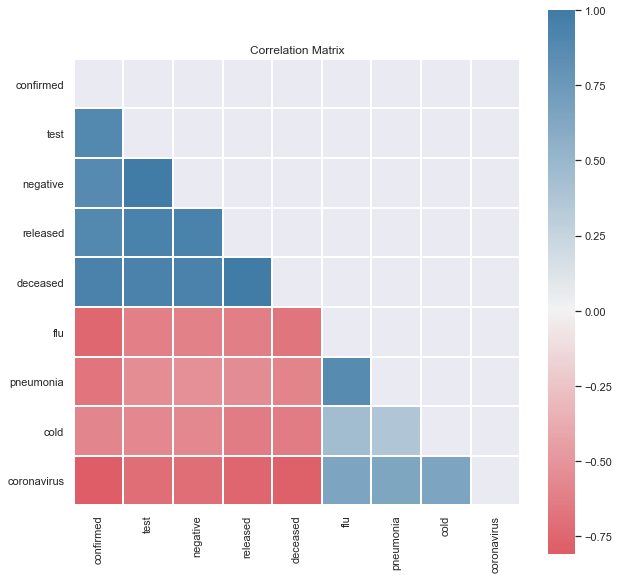

In [109]:
dd.correlation_matrix(modeling_df, cluster=True)

### PCA

Since the variables are highly correlated, there will not be an accurate linear model, thus I will use PCA to eliavate this issue.

In [110]:
features = modeling_df[
    [
        "test",
        "negative",
        "confirmed",
        "released",
        "cold",
        "flu",
        "pneumonia",
        "coronavirus",
    ]
]
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

pca = PCA(0.9)
pc = pca.fit_transform(scaled_features)

# pca.explained_variance_ratio_
print(
    "Components = ",
    pca.n_components_,
    "\nTotal explained variance = ",
    round(pca.explained_variance_ratio_.sum(), 5),
)

Components =  3 
Total explained variance =  0.9322


In [111]:
pd.DataFrame(pca.components_, columns=features.columns, index=["PC-1", "PC-2", "PC-3"])

,test,negative,confirmed,released,cold,flu,pneumonia,coronavirus
PC-1,-0.380773,-0.379680,-0.390670,-0.384809,0.284586,0.330106,0.304993,0.356615
PC-2,0.266255,0.277019,0.004062,0.257522,-0.279133,0.539384,0.645036,0.033358
PC-3,0.310574,0.307795,0.121184,0.167707,0.817861,0.002663,0.007483,0.311505


In [112]:
n_pcs= pca.components_.shape[0]

Get the index of the most important feature on EACH component i.e. largest absolute value

In [113]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [114]:
initial_feature_names = [
    "test",
    "negative",
    "confirmed",
    "released",
    "cold",
    "flu",
    "pneumonia",
    "coronavirus",
]

In [115]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [116]:
dic = {"PC{}".format(i + 1): most_important_names[i] for i in range(n_pcs)}
names = pd.DataFrame(sorted(dic.items()))

In [117]:
names

,0,1
0,PC1,confirmed
1,PC2,pneumonia
2,PC3,cold


### Basic Linear Regression


In [118]:
regression_df = modeling_df[["date", "confirmed", "pneumonia", "cold", "deceased"]]

In [119]:
regression_df["date"] = pd.to_datetime(regression_df["date"])

In [120]:
regression_df.set_index("date", inplace=True)

In [121]:
regression_df.head()

,confirmed,pneumonia,cold,deceased
date,,,,
2020-01-20,1,3.63716,0.19217,0
2020-01-21,1,4.31987,0.22462,0
2020-01-22,1,3.66416,0.23808,0
2020-01-23,1,3.18035,0.30308,0
2020-01-24,2,2.48156,0.34689,0


In [122]:
X = pca.inverse_transform(pc)
y = regression_df["deceased"]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [124]:
model = LinearRegression(positive=True).fit(X_train, y_train)

In [125]:
predictions = model.predict(X_test)

In [126]:
print("Mean squared error:", round(mean_squared_error(predictions, y_test), 1))

Mean squared error: 487.8


In [127]:
params = pd.Series(model.coef_, index=features.columns)
pd.DataFrame(params.round(0))

,0
test,0.0
negative,0.0
confirmed,141.0
released,0.0
cold,0.0
flu,0.0
pneumonia,33.0
coronavirus,0.0


In [128]:
np.random.seed(1)
err = np.std([model.fit(*resample(X_train, y_train)).coef_ for i in range(1000)], 0)

In [129]:
resample_df = pd.DataFrame({"effect": params.round(0), "error": err.round(0)})

In [130]:
resample_df

,effect,error
test,0.0,5.0
negative,0.0,2.0
confirmed,141.0,23.0
released,0.0,18.0
cold,0.0,0.0
flu,0.0,0.0
pneumonia,33.0,7.0
coronavirus,0.0,0.0


In [131]:
effect = resample_df.loc[resample_df.index == "pneumonia"]["effect"]
error = resample_df.loc[resample_df.index == "pneumonia"]["error"]

In [132]:
print(
    f"This suggests that for each additional unit of pneumonia search, the deceased patient count increased from {int(effect - error)} to {int(effect + error)}."
)

This suggests that for each additional unit of pneumonia search, the deceased patient count increased from 26 to 40.


**What is pneumonia?**

Most pneumonia occurs when a breakdown in your body's natural defenses allows germs to invade and multiply within your lungs. To destroy the attacking organisms, white blood cells rapidly accumulate. Along with bacteria and fungi, they fill the air sacs within your lungs (alveoli). Breathing may be labored. A classic sign of bacterial pneumonia is a cough that produces thick, blood-tinged or yellowish-greenish sputum with pus.

<div><img width="400px" height="auto" src=https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg" /></div>